
Training Dataset Distribution:
karbohidrat: 700 images
protein: 700 images
buah: 700 images
sayur: 700 images
minuman: 700 images
Total: 3500 images

Validation Dataset Distribution:
karbohidrat: 150 images
protein: 150 images
buah: 150 images
sayur: 150 images
minuman: 150 images
Total: 750 images

Test Dataset Distribution:
karbohidrat: 150 images
protein: 150 images
buah: 150 images
sayur: 150 images
minuman: 150 images
Total: 750 images
Found 3500 images belonging to 5 classes.
Found 750 images belonging to 5 classes.
Found 750 images belonging to 5 classes.
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733125171.356170     113 service.cc:145] XLA service 0x7c2370003910 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733125171.356280     113 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  2/110 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.3438 - loss: 1.8673  

I0000 00:00:1733125186.899025     113 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


110/110 ━━━━━━━━━━━━━━━━━━━━ 123s 888ms/step - accuracy: 0.3403 - loss: 1.8211 - val_accuracy: 0.2507 - val_loss: 1.6794 - learning_rate: 0.0010
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 81s 689ms/step - accuracy: 0.4111 - loss: 1.5113 - val_accuracy: 0.4133 - val_loss: 1.3687 - learning_rate: 0.0010
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 80s 683ms/step - accuracy: 0.4620 - loss: 1.3844 - val_accuracy: 0.3880 - val_loss: 1.4130 - learning_rate: 0.0010
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 80s 686ms/step - accuracy: 0.4653 - loss: 1.3493 - val_accuracy: 0.5027 - val_loss: 1.2589 - learning_rate: 0.0010
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 80s 682ms/step - accuracy: 0.5062 - loss: 1.2542 - val_accuracy: 0.5333 - val_loss: 1.2818 - learning_rate: 0.0010
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 80s 688ms/step - accuracy: 0.4947 - loss: 1.2719 - val_accuracy: 0.4613 - val_loss: 1.4959 - learning_rate: 0.0010
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 80s 684ms/step - accuracy: 0.5355 

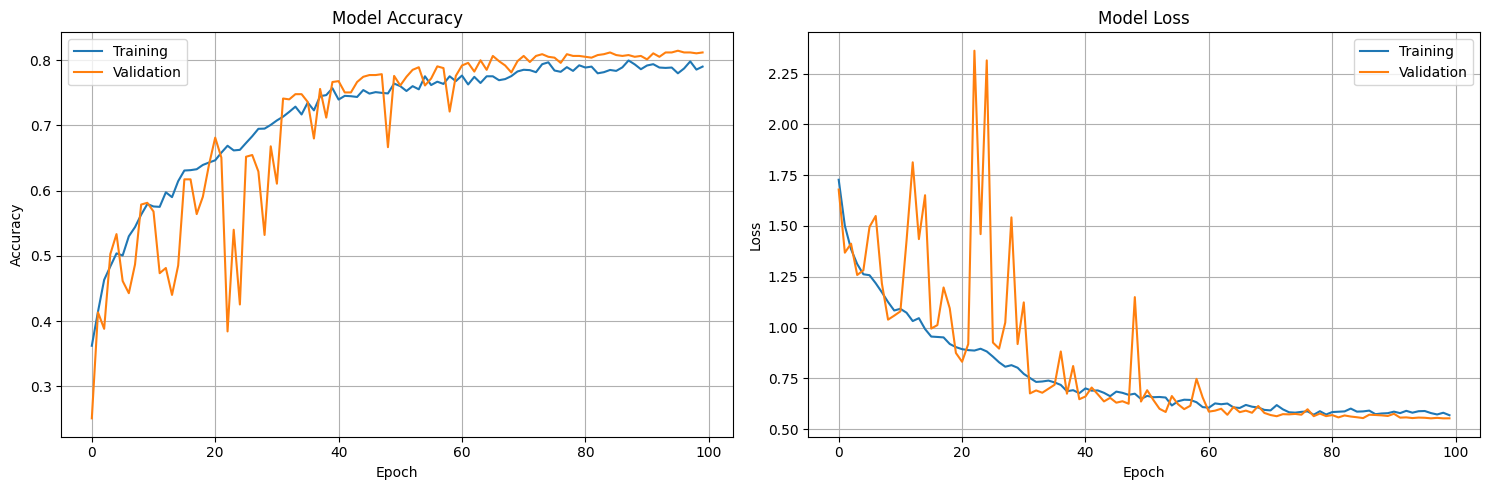


Validation Set Evaluation:
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step


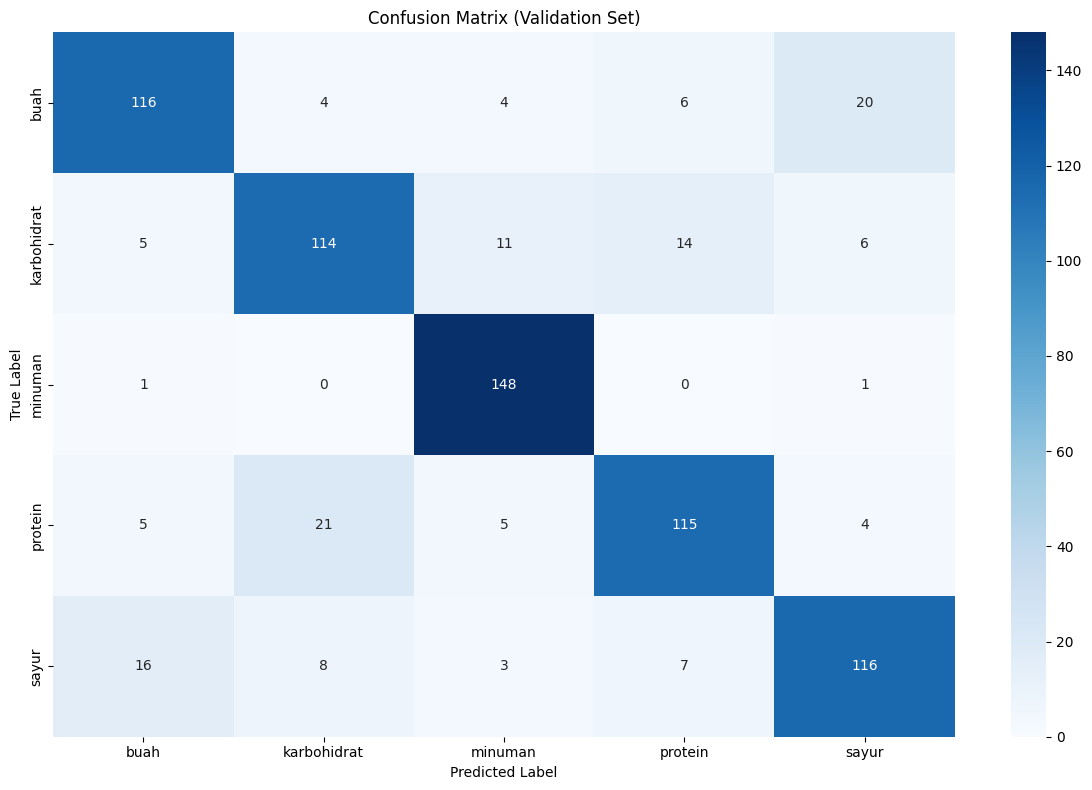


Classification Report (Validation Set):
              precision    recall  f1-score   support

        buah       0.81      0.77      0.79       150
 karbohidrat       0.78      0.76      0.77       150
     minuman       0.87      0.99      0.92       150
     protein       0.81      0.77      0.79       150
       sayur       0.79      0.77      0.78       150

    accuracy                           0.81       750
   macro avg       0.81      0.81      0.81       750
weighted avg       0.81      0.81      0.81       750


Validation Set Accuracy: 0.8120
Validation Set Loss: 0.5536

Test Set Evaluation:
 2/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step 

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 259ms/step


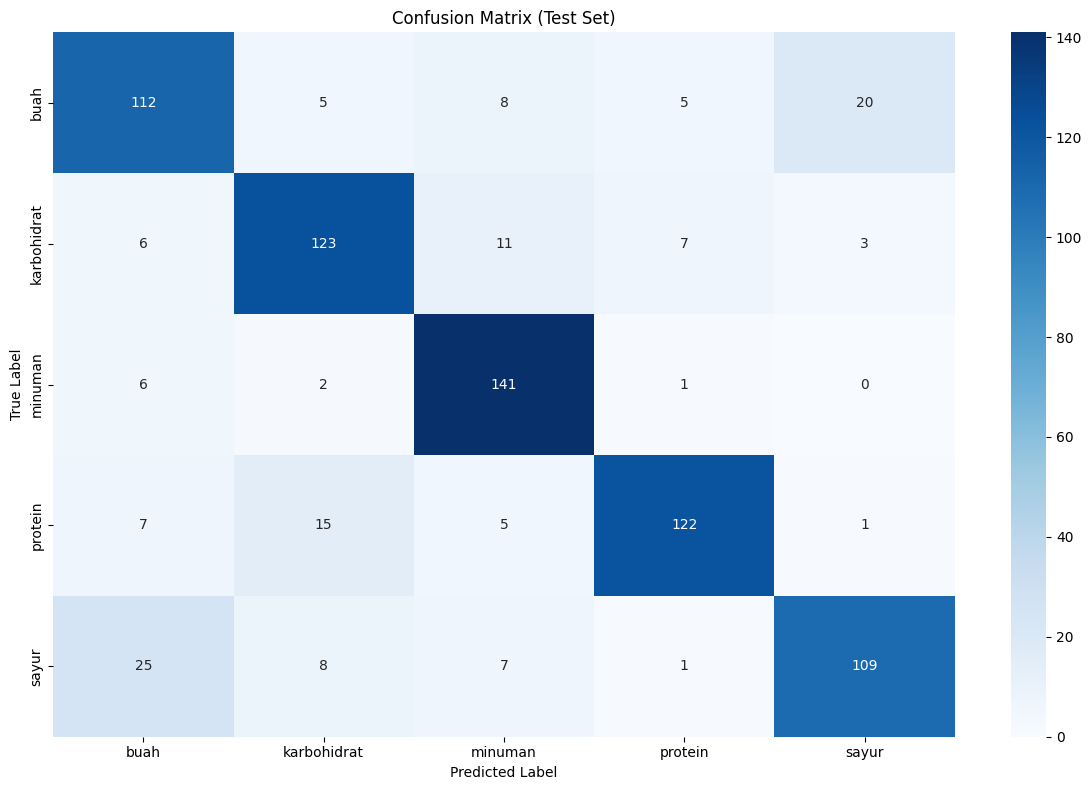


Classification Report (Test Set):
              precision    recall  f1-score   support

        buah       0.72      0.75      0.73       150
 karbohidrat       0.80      0.82      0.81       150
     minuman       0.82      0.94      0.88       150
     protein       0.90      0.81      0.85       150
       sayur       0.82      0.73      0.77       150

    accuracy                           0.81       750
   macro avg       0.81      0.81      0.81       750
weighted avg       0.81      0.81      0.81       750


Test Set Accuracy: 0.8093
Test Set Loss: 0.5313

Model and training history saved successfully!


In [2]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Dataset paths
base_dir = '/kaggle/input/data-4-sehat-5-sempurna/Dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validasi')
test_dir = os.path.join(base_dir, 'test')

# Print dataset distribution
def print_dataset_info():
    categories = ['karbohidrat', 'protein', 'buah', 'sayur', 'minuman']
    for split, directory in [('Training', train_dir), ('Validation', validation_dir), ('Test', test_dir)]:
        print(f"\n{split} Dataset Distribution:")
        total = 0
        for category in categories:
            path = os.path.join(directory, category)
            count = len(os.listdir(path)) if os.path.exists(path) else 0
            total += count
            print(f'{category}: {count} images')
        print(f'Total: {total} images')

print_dataset_info()

# Enhanced Data Augmentation with more aggressive transformations
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    brightness_range=[0.7, 1.3],
    shear_range=0.2,
    channel_shift_range=0.2,
    preprocessing_function=lambda x: tf.image.random_contrast(x, 0.7, 1.3)
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Increased image size and adjusted batch size
IMG_SIZE = 256  # Increased from 224
BATCH_SIZE = 32 # Increased for better stability

# Create generators with class balancing
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Modified Early Stopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    min_delta=0.001
)

# Modified Learning Rate Schedule
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# Improved CNN Architecture with Residual Connections
def create_improved_model():
    inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    # Initial Conv Block
    x = tf.keras.layers.Conv2D(64, (7, 7), strides=2, padding='same')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPooling2D(3, strides=2, padding='same')(x)
    
    # Residual Block 1
    shortcut = x
    x = tf.keras.layers.Conv2D(128, (3, 3), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    shortcut = tf.keras.layers.Conv2D(128, (1, 1), padding='same')(shortcut)
    x = tf.keras.layers.Add()([x, shortcut])
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPooling2D(2)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    
    # Residual Block 2
    shortcut = x
    x = tf.keras.layers.Conv2D(256, (3, 3), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.Conv2D(256, (3, 3), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    shortcut = tf.keras.layers.Conv2D(256, (1, 1), padding='same')(shortcut)
    x = tf.keras.layers.Add()([x, shortcut])
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPooling2D(2)(x)
    x = tf.keras.layers.Dropout(0.4)(x)
    
    # Global Average Pooling and Dense Layers
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(512)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(5, activation='softmax')(x)
    
    model = tf.keras.Model(inputs, outputs)
    return model

# Create and compile model with mixed precision
tf.keras.mixed_precision.set_global_policy('mixed_float16')
model = create_improved_model()
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
optimizer = tf.keras.mixed_precision.LossScaleOptimizer(optimizer)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
EPOCHS = 100
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

# # Train model
# EPOCHS = 100
# history = model.fit(
#     train_generator,
#     epochs=EPOCHS,
#     validation_data=validation_generator,
#     callbacks=[early_stopping, reduce_lr],
#     workers=4,
#     use_multiprocessing=True
# )

# Plot training history
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Accuracy plot
    ax1.plot(history.history['accuracy'], label='Training')
    ax1.plot(history.history['val_accuracy'], label='Validation')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)
    
    # Loss plot
    ax2.plot(history.history['loss'], label='Training')
    ax2.plot(history.history['val_loss'], label='Validation')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

plot_training_history(history)

# Model evaluation
def evaluate_model(model, generator, set_name="Test"):
    # Predictions
    predictions = model.predict(generator, verbose=1)
    y_pred = np.argmax(predictions, axis=1)
    y_true = generator.classes
    
    # Get class names
    class_names = list(generator.class_indices.keys())
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title(f'Confusion Matrix ({set_name} Set)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()
    
    # Classification Report
    print(f"\nClassification Report ({set_name} Set):")
    print(classification_report(y_true, y_pred, target_names=class_names))
    
    # Overall Metrics
    loss, accuracy = model.evaluate(generator, verbose=0)
    print(f"\n{set_name} Set Accuracy: {accuracy:.4f}")
    print(f"{set_name} Set Loss: {loss:.4f}")

# Evaluate on validation and test sets
# print("\Train Set Evaluation:")
# evaluate_model(model, train_generator, "Train")

print("\nValidation Set Evaluation:")
evaluate_model(model, validation_generator, "Validation")

print("\nTest Set Evaluation:")
evaluate_model(model, test_generator, "Test")

# Save model and history
model.save('/kaggle/working/model.h5')
history_df = pd.DataFrame(history.history)
history_df.to_csv('/kaggle/working/training_history.csv')
print("\nModel and training history saved successfully!")

Train Set Evaluation:
110/110 ━━━━━━━━━━━━━━━━━━━━ 70s 638ms/step


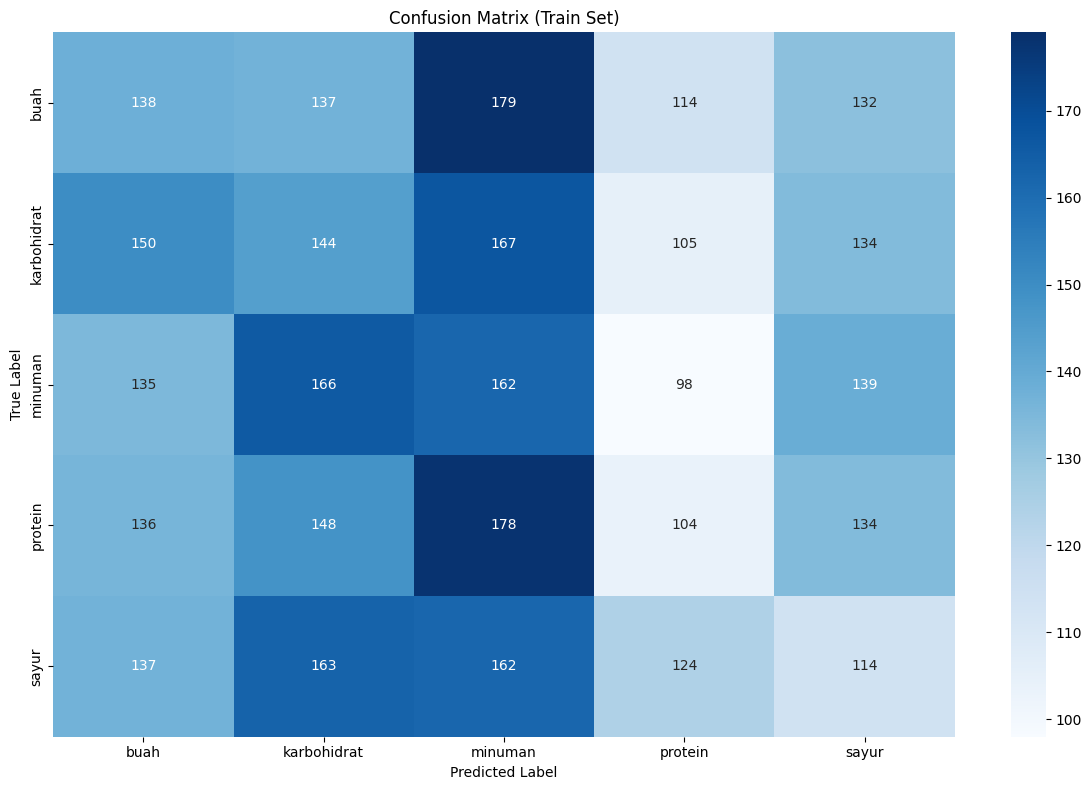


Classification Report (Train Set):
              precision    recall  f1-score   support

        buah       0.20      0.20      0.20       700
 karbohidrat       0.19      0.21      0.20       700
     minuman       0.19      0.23      0.21       700
     protein       0.19      0.15      0.17       700
       sayur       0.17      0.16      0.17       700

    accuracy                           0.19      3500
   macro avg       0.19      0.19      0.19      3500
weighted avg       0.19      0.19      0.19      3500


Train Set Accuracy: 0.8083
Train Set Loss: 0.5187


In [3]:
# Evaluate on train sets
print("Train Set Evaluation:")
evaluate_model(model, train_generator, "Train")